# Installing twarc and accessing the API

In [ ]:
pip install twarc

In [ ]:
from twarc import Twarc

Alternatives
* [tweepy](https://www.tweepy.org/) (Python)
* [twitteR](https://www.rdocumentation.org/packages/twitteR/versions/1.1.9) (R)
* Using twarc from the command line [https://twarc-project.readthedocs.io/en/latest/](https://twarc-project.readthedocs.io/en/latest/).

In [ ]:
# NOTE: these are my personal credentials. For this code to work on your 
# computer, you will need a file named "API_credentials.txt" in the same 
# directory as this script, with the information stored in the form
# access_token=WWW
# access_token_secret=XXX
# consumer_key=YYY
# consumer_secret=ZZZ

credentials = {}
with open('API_credentials.txt', 'r') as f:
    for line in f:
        credentials[line.split('=')[0]] = line.split('=')[1].strip('\n')
        
access_token = credentials['access_token']
access_token_secret = credentials['access_token_secret']
consumer_key = credentials['consumer_key']
consumer_secret = credentials['consumer_secret']

In [ ]:
# alternatively, you can also paste the info from the app you just created here
# see https://developer.twitter.com/en/portal/projects-and-apps
access_token = 'WWW'
access_token_secret = 'XXX'
consumer_key = 'YYY'
consumer_secret = 'ZZZ'

# Different endpoints

Have a look at the [documentation](https://twarc-project.readthedocs.io/en/latest/api/client/#twarc.client) for additional info and more endpoints!

## Search

In [ ]:
# instantiate a Twarc client with your API access credentials
t = Twarc(consumer_key, consumer_secret, access_token, access_token_secret)

# empty list to store the search results
tweets = [] 

# tweets we look for should contain the following search string
search_string = '#Göttingen'

# search Twitter for Tweets containing the search string and store all the 
# results in the list
for tweet in t.search(search_string):
    tweets.append(tweet)

In [ ]:
tweets[0]['full_text']

## Timeline

In [ ]:
tweets = []
# instead of the "search" endpoint, we now use the "timeline" endpoint to
# retrieve all Tweets by a given user (identified by their user name)
for tweet in t.timeline(screen_name='janalasser'):
    tweets.append(tweet)

In [ ]:
tweets[0]['full_text']

## Followers

In [ ]:
followers = []
# we can use the "followers" endpoint to get the user ids of all followers of
# a given user
for follower_id in t.follower_ids('janalasser'):
    followers.append(follower_id)

In [ ]:
followers[0]

## User lookup

In [ ]:
users = []
# given a list of user IDs, we can retrieve their user profile information by
# using the "user lookup" endpoint
for user in t.user_lookup(followers[0:10]):
    users.append(user)

In [ ]:
users[0]

# Data fields

In [ ]:
# The API returns JSON objects which are parsed as dictionaries in Python.
# Dictionaries contain pairs of (key, value), where "key" is the name of a 
# "data field", such as "id" for the Tweet ID, and "value" contains the value
# of the specific data field
tweets[0]['id']

In [ ]:
tweets[0].keys()

In [ ]:
# Different API endpoints return different JSON objects, depending on whether
# they return Tweet or User objects
users[0].keys()

# API limitations

**Standard access with V1.1 API**
* Rate limits (see detailed info for the [GET endpoint](https://developer.twitter.com/en/docs/twitter-api/v1/rate-limits))
* Example: rate limit on the search endpoint is 180 requests / 15 min. Every request can return a maximum of 100 tweets. Therefore you can download a maximum of 72000 Tweets / hour.
* Only tweets from the last 7 days accessible -> look into streaming tweets if you want more.

**V2 API & academic access**
* Full archival search
* 10 mio tweets / month
* ```counts``` endpoint (very useful!)
* See [documentation](https://developer.twitter.com/en/docs/twitter-api/early-access) for more info

# A "counts" example

In [50]:
credentials_V2 = {}
with open('API_credentials_V2.txt', 'r') as f:
    for line in f:
        credentials_V2[line.split('=')[0]] = line.split('=')[1].strip('\n')
        
bearer_token = credentials_V2['bearer_token']

In [51]:
from twarc import Twarc2
from datetime import datetime

In [52]:
tV2 = Twarc2(bearer_token=bearer_token)

In [91]:
day_count = []
start = datetime.strptime('2021-01-01', '%Y-%m-%d')
end = datetime.strptime('2021-09-24', '%Y-%m-%d')
search_string = '#btw21'
for c in tV2.counts_all(search_string, start_time=start, end_time=end, granularity='day'):
    day_count.extend(c['data'])

In [74]:
day_count[0:10]

[{'end': '2021-08-25T00:00:00.000Z',
  'start': '2021-08-24T00:00:00.000Z',
  'tweet_count': 11057},
 {'end': '2021-08-26T00:00:00.000Z',
  'start': '2021-08-25T00:00:00.000Z',
  'tweet_count': 6758},
 {'end': '2021-08-27T00:00:00.000Z',
  'start': '2021-08-26T00:00:00.000Z',
  'tweet_count': 6233},
 {'end': '2021-08-28T00:00:00.000Z',
  'start': '2021-08-27T00:00:00.000Z',
  'tweet_count': 7574},
 {'end': '2021-08-29T00:00:00.000Z',
  'start': '2021-08-28T00:00:00.000Z',
  'tweet_count': 5758},
 {'end': '2021-08-30T00:00:00.000Z',
  'start': '2021-08-29T00:00:00.000Z',
  'tweet_count': 6551},
 {'end': '2021-08-31T00:00:00.000Z',
  'start': '2021-08-30T00:00:00.000Z',
  'tweet_count': 7747},
 {'end': '2021-09-01T00:00:00.000Z',
  'start': '2021-08-31T00:00:00.000Z',
  'tweet_count': 9733},
 {'end': '2021-09-02T00:00:00.000Z',
  'start': '2021-09-01T00:00:00.000Z',
  'tweet_count': 7164},
 {'end': '2021-09-03T00:00:00.000Z',
  'start': '2021-09-02T00:00:00.000Z',
  'tweet_count': 8985}]

In [ ]:
pip install pandas

In [77]:
import pandas as pd

counts = pd.DataFrame()
for day in day_count:
    counts = counts.append(day, ignore_index=True)
    
counts.head(3)

,end,start,tweet_count
0,2021-08-25T00:00:00.000Z,2021-08-24T00:00:00.000Z,11057.0
1,2021-08-26T00:00:00.000Z,2021-08-25T00:00:00.000Z,6758.0
2,2021-08-27T00:00:00.000Z,2021-08-26T00:00:00.000Z,6233.0


In [87]:
counts = counts.sort_values(by='start')
counts['start'] = pd.to_datetime(counts['start'])
counts['end'] = pd.to_datetime(counts['end'])
counts.head(3)

,end,start,tweet_count
248,2021-01-02 00:00:00+00:00,2021-01-01 00:00:00+00:00,346.0
249,2021-01-03 00:00:00+00:00,2021-01-02 00:00:00+00:00,183.0
250,2021-01-04 00:00:00+00:00,2021-01-03 00:00:00+00:00,144.0


In [ ]:
pip install matplotlib

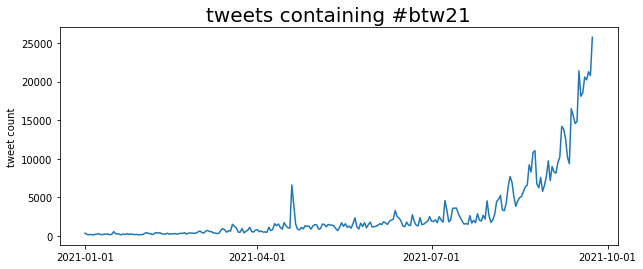

In [93]:
import matplotlib.pyplot as plt

fix, ax = plt.subplots(figsize=(10, 4))
ax.plot(counts['start'], counts['tweet_count'])

ticks = ['2021-01-01', '2021-04-01', '2021-07-01', '2021-10-01']
ax.set_xticks([pd.to_datetime(tick) for tick in ticks])
ax.set_ylabel('tweet count')
ax.set_title('tweets containing {}'.format(search_string), fontsize=20);